In [21]:
using Pkg
Pkg.activate("/Users/jiyong/.juliaenv/image")
using OpenCV, TestImages
cv2 = OpenCV;

  Activating project at `~/.juliaenv/image`


In [103]:
function arr2mat(arr::Matrix{T}) where T
    cv2.Mat(permutedims(stack([arr, ]), [3,2,1]))
end

function arr2mat(arr::Array{T, 3}) where T
    cv2.Mat(arr)
end

function img2arr(img)
    T = typeof(img[1, 1].val.i)
    broadcast(q->T(q.val.i),img)
end

function img2mat(img) 
    T = typeof(img[1, 1].val.i)
    tm = broadcast(q->T(q.val.i),img)
    cv2.Mat(permutedims(stack([tm, ]), [3,2,1]))
end

function mat2arr(mat::OpenCV.Mat)
    return permutedims(mat.data, [3,2,1])
end

img0= testimage_dip3e("Fig0108(a) (corn-fluorescence).tif")
img1 = img2arr(img0)
img2 = (UInt8(255) .- img1)
r = arr2mat(cat(img1, img2;dims=2))
cv2.imwrite("inversion.jpg", r)

true

In [139]:
img0= testimage_dip3e("Fig0227(a)(washington_infrared).tif")
img1 = cv2.resize(img2mat(img0), cv2.Size{Int32}(256, 256))
img2 = arr2mat(round.(UInt8, ((img1./255).^0.5)*255))
img3 = arr2mat(round.(UInt8, ((img1./255).^2)*255))
img4 = arr2mat(round.(UInt8, ((img1./255).^5)*255));

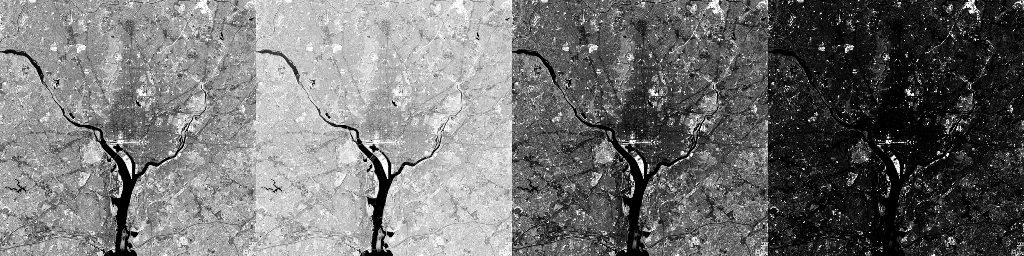

In [140]:
arr2mat(cat(img1, img2, img3, img4; dims=2))

In [118]:
cv2.Point(Int32(0), Int32(100))

OpenCV.Point{Int32}(0, 100)

In [181]:
#cv2.calcHist([img1,], Int32[0], arr2mat(Array{UInt8}(undef, 0, 0)), Int32[256], Float32[0, 256])
cv2.calcHist([mat2arr(img1)[:,:,1],])

MethodError: MethodError: no method matching calcHist(::Vector{Matrix{UInt8}})

Closest candidates are:
  calcHist(!Matched::Vector{Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}}, !Matched::Vector{Int32}, !Matched::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, !Matched::Vector{Int32}, !Matched::Vector{Float32}; hist, accumulate)
   @ OpenCV ~/.julia/artifacts/150dfaafce23ef83fd2922215ca12ea559ad4f8c/OpenCV/src/cv_cxx_wrap.jl:1804
  calcHist(!Matched::Vector{Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}}, !Matched::Vector{Int32}, !Matched::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, !Matched::Vector{Int32}, !Matched::Vector{Float32}, !Matched::Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}, !Matched::Bool)
   @ OpenCV ~/.julia/artifacts/150dfaafce23ef83fd2922215ca12ea559ad4f8c/OpenCV/src/cv_cxx_wrap.jl:1801


In [199]:
isa([img1,], Vector{Union{OpenCV.CxxMat, AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}}})

false

In [209]:
mat2arr(img1) isa AbstractArray{T, 3} where T<:Union{Float32, Float64, Int16, Int32, Int8, UInt16, UInt8}

true

In [206]:
cv2.CxxMat(img1)

MethodError: MethodError: no method matching OpenCV.CxxMat(::OpenCV.Mat{UInt8})

Closest candidates are:
  OpenCV.CxxMat()
   @ OpenCV ~/.julia/packages/CxxWrap/eWADG/src/CxxWrap.jl:668
  OpenCV.CxxMat(!Matched::Integer, !Matched::Union{Ptr{Nothing}, Ref{Int32}, Array{Int32}}, !Matched::Integer, !Matched::Ptr{Nothing}, !Matched::Union{Ptr{Nothing}, Ref{UInt64}, Array{UInt64}})
   @ OpenCV ~/.julia/packages/CxxWrap/eWADG/src/CxxWrap.jl:668
